In [10]:
import glob
import pandas as pd
from ML2_lib import RV_SGDAve
from ML2_lib import loss
from ML2_lib import plot_set
import numpy as np
import datetime

In [6]:

files = glob.glob("../exp/simulation/remote_exp/remote_save_result/w_init_Rosenbrock_lognormal10:06:20:15:40/*")
for file in files:
    df = pd.read_csv(file)

In [7]:
df

,1,2,4,5,10,20
0,18620.220636,5279.757402,52.182568,848.839259,6760.090194,12674.499233
1,32661.230206,5715.130542,50.085208,806.322949,6758.914409,12670.930632
2,30516.034282,5569.889143,50.416207,847.557987,6740.868479,12669.526333
3,19714.343093,7905.541991,49.046366,833.896496,6588.960197,12669.974828
4,28053.129057,7887.997249,48.769794,840.854127,6774.975906,12670.298093
...,...,...,...,...,...,...
95,25119.553891,7253.094850,56.208148,849.091986,6768.255468,12687.443349
96,23723.735231,7488.027088,57.298396,852.712983,6761.243926,12669.976069
97,23437.427022,6111.003197,47.242723,853.638184,6759.427896,12670.375045
98,33205.235464,6501.702436,48.399896,852.086172,6617.074725,12706.706324


In [8]:
df.values

array([[18620.22063557,  5279.75740173,    52.18256807,   848.83925925,
         6760.09019376, 12674.49923307],
       [32661.23020647,  5715.13054216,    50.08520788,   806.322949  ,
         6758.91440938, 12670.93063159],
       [30516.03428175,  5569.88914296,    50.41620655,   847.55798714,
         6740.86847864, 12669.52633264],
       [19714.34309263,  7905.54199071,    49.04636648,   833.89649578,
         6588.96019703, 12669.97482775],
       [28053.12905686,  7887.99724921,    48.76979378,   840.85412723,
         6774.97590554, 12670.29809291],
       [30751.63190867,  6736.71899008,    47.81466396,   874.45089451,
         6930.13830521, 12670.04239747],
       [18554.84562103,  7814.15770459,    51.971551  ,   849.8568195 ,
         6792.69727204, 12574.06251862],
       [25818.82705357,  6246.89281865,    50.24248731,   836.71840308,
         6747.71351114, 12680.98946454],
       [29367.05992805,  5622.5320318 ,    52.05311041,   833.91474772,
         6667.2928539 , 

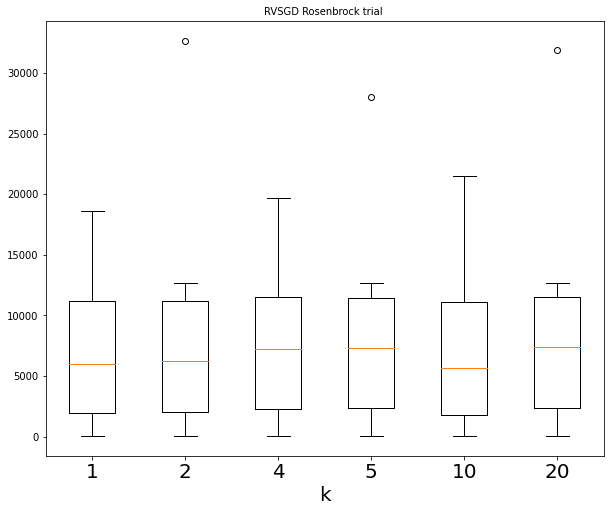

In [13]:
title = f"RVSGD Rosenbrock trial "
k_list = [0, 1, 3, 4, 9, 19]
k_string = [f"{i + 1}" for i in k_list]
result = df.values.T

plot_set.box_plot_k(result, k_list, k_string, title)

In [12]:
result


array([[18620.22063557,  5279.75740173,    52.18256807,   848.83925925,
         6760.09019376, 12674.49923307],
       [32661.23020647,  5715.13054216,    50.08520788,   806.322949  ,
         6758.91440938, 12670.93063159],
       [30516.03428175,  5569.88914296,    50.41620655,   847.55798714,
         6740.86847864, 12669.52633264],
       [19714.34309263,  7905.54199071,    49.04636648,   833.89649578,
         6588.96019703, 12669.97482775],
       [28053.12905686,  7887.99724921,    48.76979378,   840.85412723,
         6774.97590554, 12670.29809291],
       [30751.63190867,  6736.71899008,    47.81466396,   874.45089451,
         6930.13830521, 12670.04239747],
       [18554.84562103,  7814.15770459,    51.971551  ,   849.8568195 ,
         6792.69727204, 12574.06251862],
       [25818.82705357,  6246.89281865,    50.24248731,   836.71840308,
         6747.71351114, 12680.98946454],
       [29367.05992805,  5622.5320318 ,    52.05311041,   833.91474772,
         6667.2928539 , 